In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc,confusion_matrix

In [5]:
df = pd.read_csv('framingham.csv')

In [6]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [11]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [12]:
df = df.dropna()

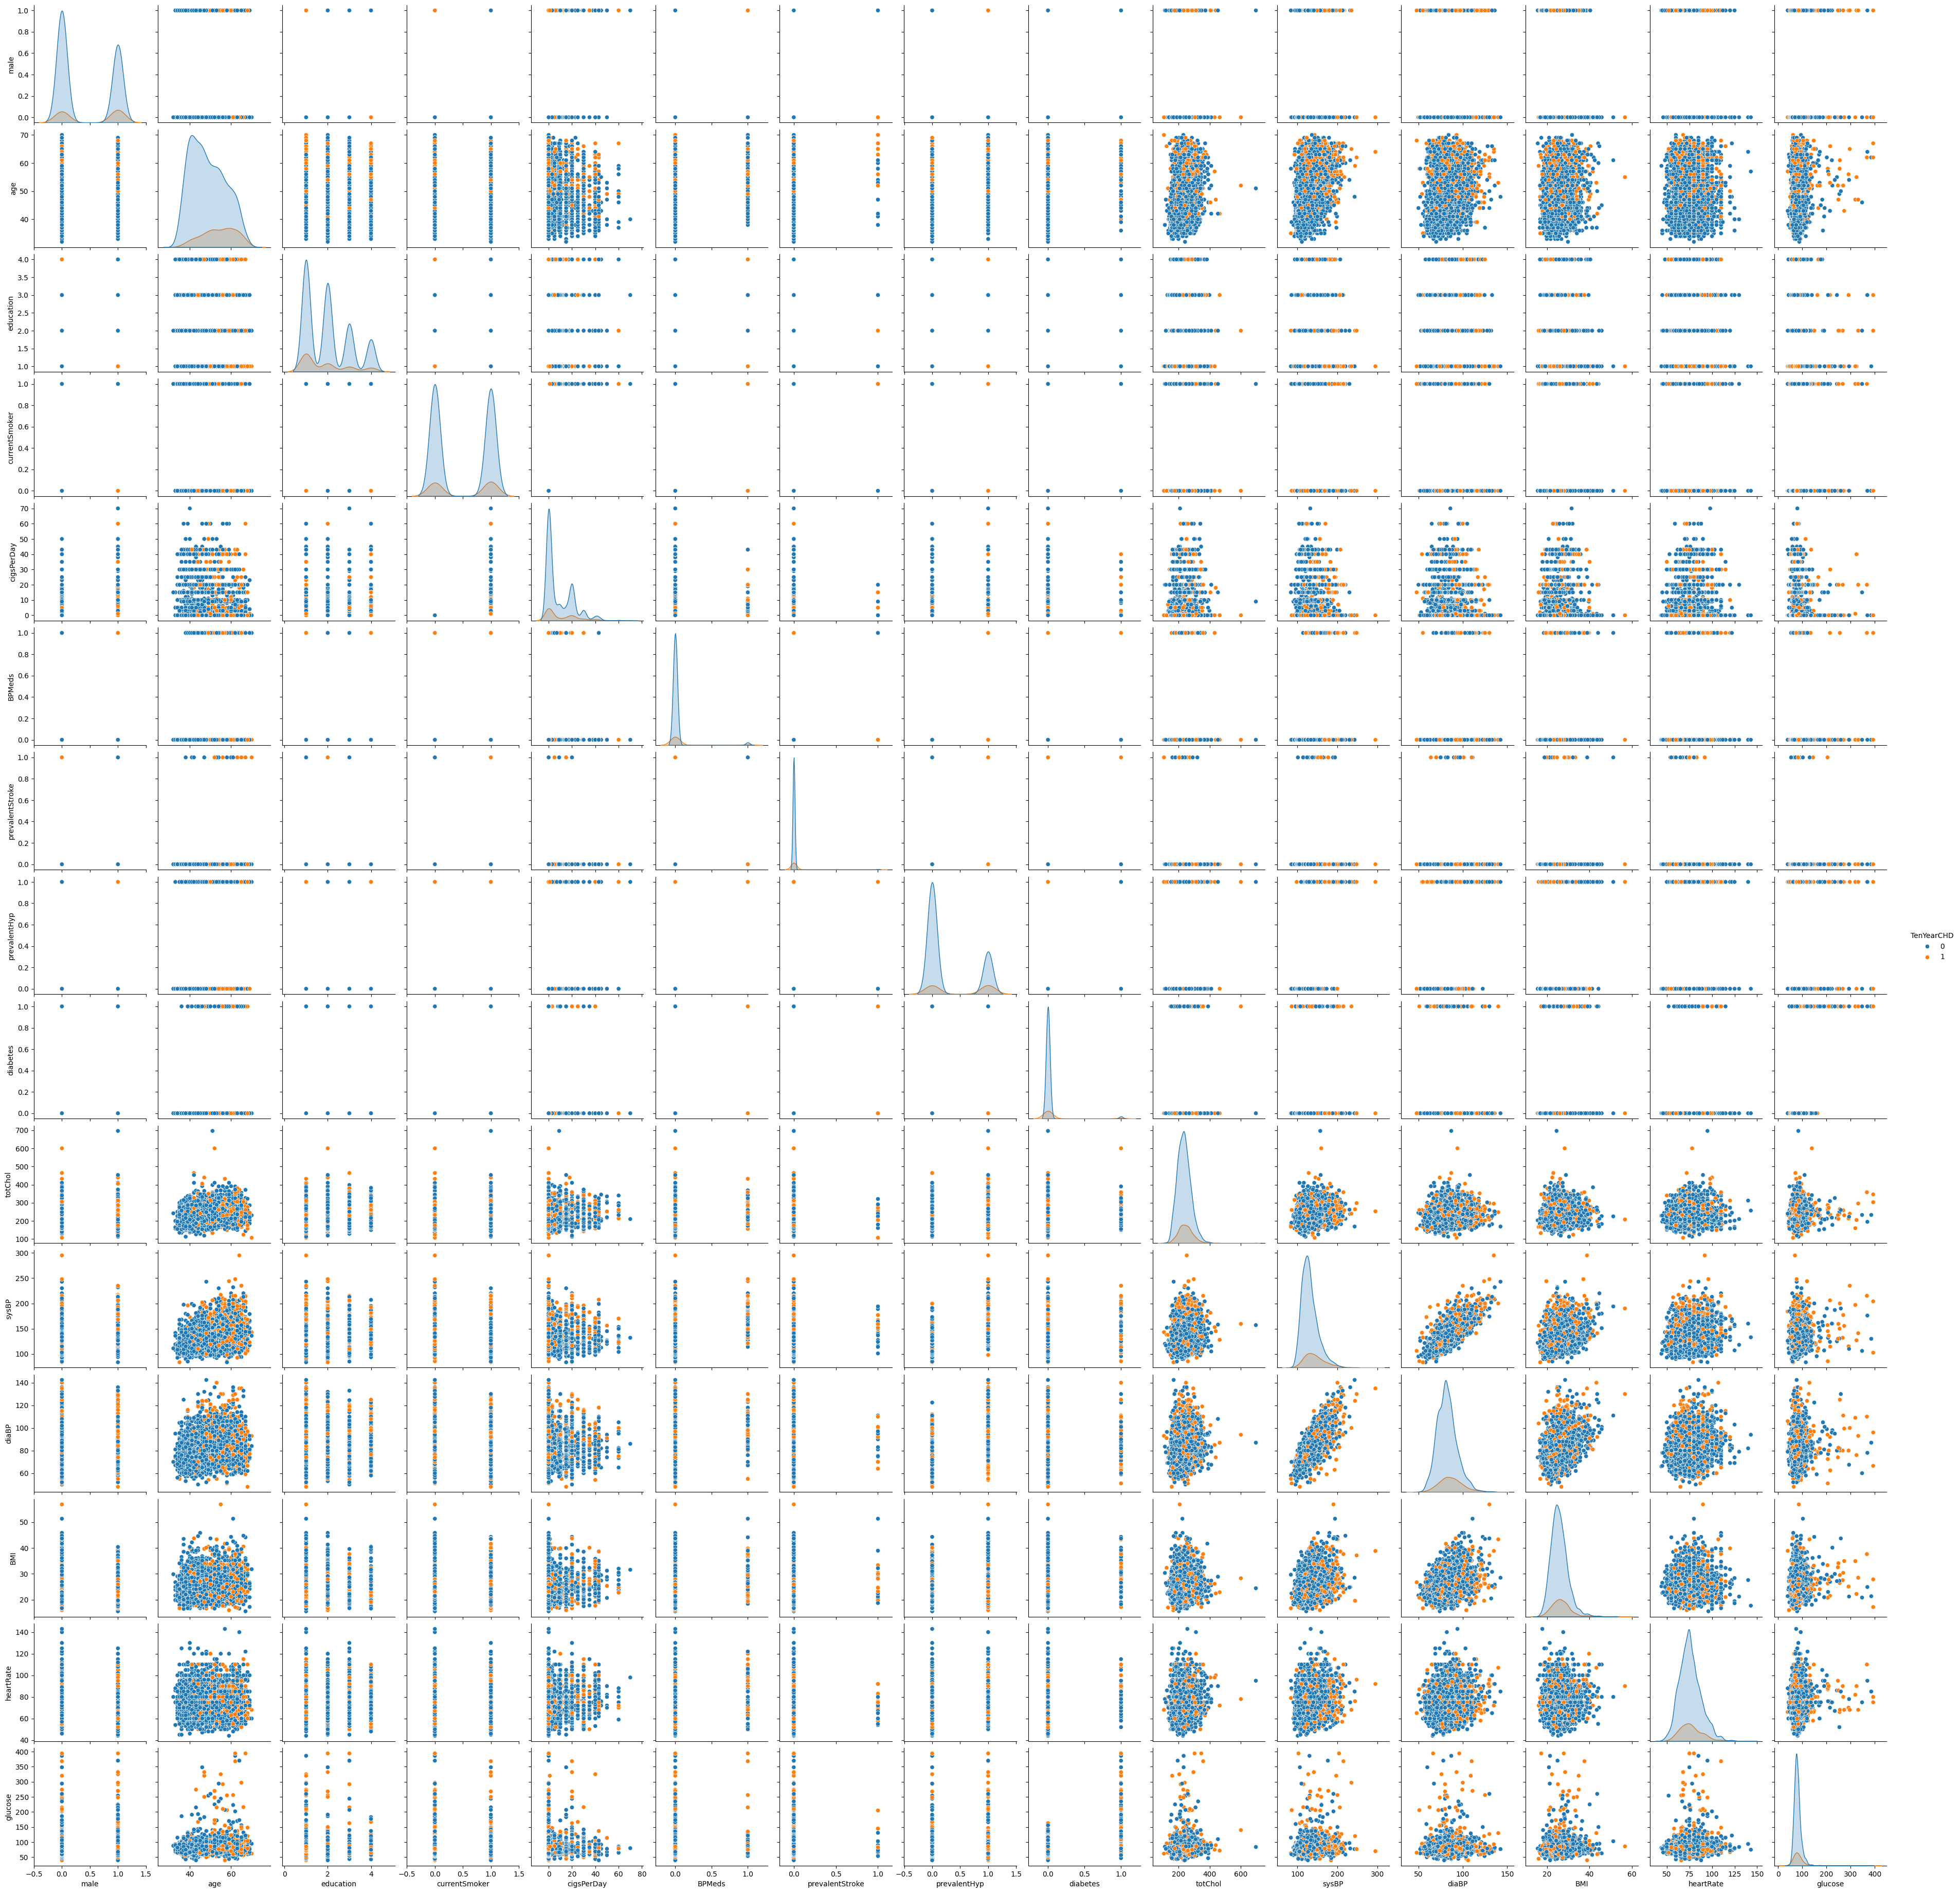

In [7]:
sns.pairplot(df,hue='TenYearCHD')

In [13]:
X = df.drop(columns=['TenYearCHD'])
y = df[['TenYearCHD']]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [15]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr

/home/rahulvk/Documents/MLLAB/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rahulvk/Documents/MLLAB/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
nb = GaussianNB()
nb.fit(X_train,y_train)

/home/rahulvk/Documents/MLLAB/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [18]:
y_pred_lr = lr.predict(X_test)
y_pred_nb = nb.predict(X_test)

In [22]:
## Accuracy

def evaluate(classifier,y_pred,y_test):
    print("Accuracy: ",accuracy_score(y_pred,y_test))
    print("Precision: ",precision_score(y_pred,y_test,average='weighted'))
    print("Recall: ",recall_score(y_pred,y_test,average='weighted'))
    print("F1 Score: ",f1_score(y_pred,y_test,average='weighted'))



In [23]:
print("********Logistic Regression********")
evaluate(lr,y_pred_lr,y_test)

print("********Naive Bayes********")
evaluate(nb,y_pred_nb,y_test)

********Logistic Regression********
Accuracy:  0.8346994535519126
Precision:  0.9846430338647245
Recall:  0.8346994535519126
F1 Score:  0.9001246682587929
********Naive Bayes********
Accuracy:  0.8128415300546448
Precision:  0.8805076765134121
Recall:  0.8128415300546448
F1 Score:  0.8417063737656162


In [36]:
def plot_cm(model_name,y_pred,y_test):
    classes = [0,1]
    cm = confusion_matrix(y_test,y_pred)
    plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(model_name)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    plt.colorbar()
    plt.ylabel('True Labels')
    plt.xlabel('Predicted Labels')
    

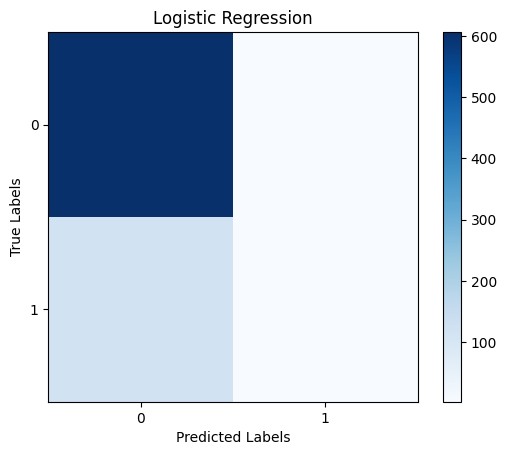

In [37]:
plot_cm('Logistic Regression',y_pred_lr,y_test)


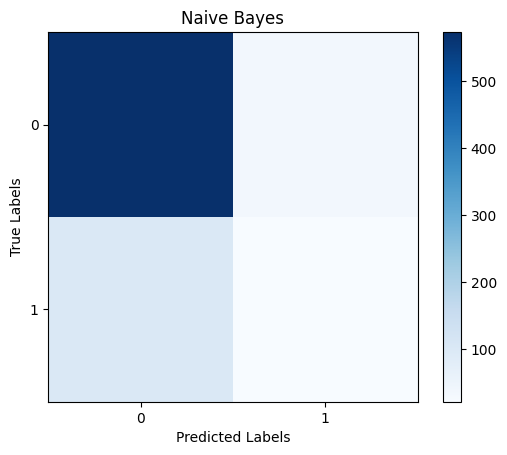

In [38]:
plot_cm('Naive Bayes',y_pred_nb,y_test)